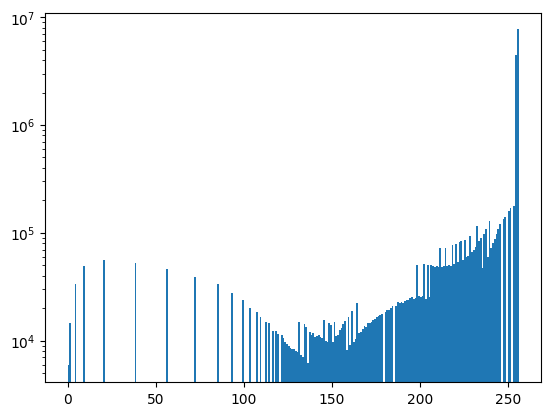

In [6]:
#read image and take histogram of it
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Worm2Remapped.png')
plt.hist(img.ravel(),256,[0,256],log=True)
plt.show()


In [112]:
def segment_worm(frame, parent=None):
    print("Segmenting worm...")
    frame = cv2.resize(frame, (640, 480))
    # display_results("Original Frame", frame, scale=2, parent=parent)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # display_results("Grayscale Image", gray, scale=2, parent=parent)
    # plt.hist(gray.ravel(), 256, [0, 256], log = True)
    # plt.show()

    gray_equalized = cv2.equalizeHist(gray)
    # display_results("Contrast Enhanced Image", gray_equalized, scale=2, parent=parent)
    # plt.imshow(gray_equalized, cmap='gray')
    # plt.show()

    blurred = cv2.GaussianBlur(gray_equalized, (3, 3), 1)
    # display_results("Blurred Image", blurred, scale=2, parent=parent)
    # plt.imshow(blurred, cmap='gray')
    # plt.show()

    block_size = 15  
    C = 3
    binary = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, block_size, C)
    # display_results("Binary Image", binary, scale=2, parent=parent)
    # plt.imshow(binary, cmap='gray')
    # plt.show()

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    print(f"Kernel: {kernel}")
    opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)
    # display_results("Morphologically Cleaned Image", opened, scale=2, parent=parent)
    # plt.imshow(opened, cmap='gray')
    # plt.show()

    contours, hierarchy = cv2.findContours(
        opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"Total Contours Found: {len(contours)}")

    if not contours:
        # messagebox.showerror("Error", "No contours found.")
        return None, None, None, None, None

    worm_contour = None
    max_length = 0
    for idx, cnt in enumerate(contours):
        length = cv2.arcLength(cnt, closed=False)
        x_cnt, y_cnt, w_cnt, h_cnt = cv2.boundingRect(cnt)
        aspect_ratio = float(h_cnt)/w_cnt if w_cnt != 0 else 0
        print(f"Contour {idx+1}: Length={length:.2f}, Aspect Ratio={aspect_ratio:.2f}")
        if length > max_length and aspect_ratio > 0.5:
            max_length = length
            worm_contour = cnt

    if worm_contour is None:
        # messagebox.showerror("Error", "Worm contour could not be detected.")
        return None, None, None, None, None

    print(f"Selected Worm Contour Length: {max_length:.2f}")

    worm_mask = np.zeros_like(gray)
    cv2.drawContours(worm_mask, [worm_contour], -1, 255, -1)
    # display_results("Worm Mask", worm_mask, scale=2, parent=parent)
    plt.imshow(worm_mask, cmap='gray')
    plt.show()

    # Apply median filter to smooth the mask
    worm_mask_filtered5 = cv2.medianBlur(worm_mask, 7)
    # display_results("Worm Mask Median Filter5", worm_mask_filtered5, scale=2, parent=parent)
    plt.imshow(worm_mask_filtered5, cmap='gray')
    plt.show()


    segmented_worm = cv2.bitwise_and(frame, frame, mask=worm_mask_filtered5)

    # display_results("Segmented Worm", segmented_worm, scale=2, parent=parent)
    plt.imshow(segmented_worm)
    plt.show()

    # Get the bounding rectangle of the worm contour
    x, y, w, h = cv2.boundingRect(worm_contour)
    x, y = max(x, 0), max(y, 0)
    x_end, y_end = min(x + w, frame.shape[1]), min(y + h, frame.shape[0])

    # Crop the segmented worm image to the bounding rectangle
    cropped_worm = segmented_worm[y:y_end, x:x_end]
    # display_results("Cropped Worm", cropped_worm, scale=2, parent=parent)
    plt.imshow(cropped_worm)
    plt.show()

    print(f"Cropped worm shape: {cropped_worm.shape}, bounding box: ({x},{y}) to ({x_end},{y_end})")

    return worm_mask_filtered5, worm_contour, cropped_worm, x, y



Segmenting worm...
Kernel: [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
Total Contours Found: 853
Contour 1: Length=9.41, Aspect Ratio=0.60
Contour 2: Length=9.41, Aspect Ratio=0.60
Contour 3: Length=11.83, Aspect Ratio=0.50
Contour 4: Length=12.83, Aspect Ratio=0.43
Contour 5: Length=9.41, Aspect Ratio=0.60
Contour 6: Length=20.24, Aspect Ratio=1.00
Contour 7: Length=12.24, Aspect Ratio=1.00
Contour 8: Length=12.24, Aspect Ratio=1.00
Contour 9: Length=12.24, Aspect Ratio=1.00
Contour 10: Length=50.28, Aspect Ratio=0.57
Contour 11: Length=12.24, Aspect Ratio=1.00
Contour 12: Length=12.24, Aspect Ratio=1.00
Contour 13: Length=12.24, Aspect Ratio=1.00
Contour 14: Length=12.24, Aspect Ratio=1.00
Contour 15: Length=12.24, Aspect Ratio=1.00
Contour 16: Length=12.24, Aspect Ratio=1.00
Contour 17: Length=14.24, Aspect Ratio=1.20
Contour 18: Length=14.24, Aspect Ratio=1.20
Contour 19: Length=37.97, Aspect Ratio=1.40
Contour 20: Length=12.24, Aspect Ratio=1.00
Contour 21: L

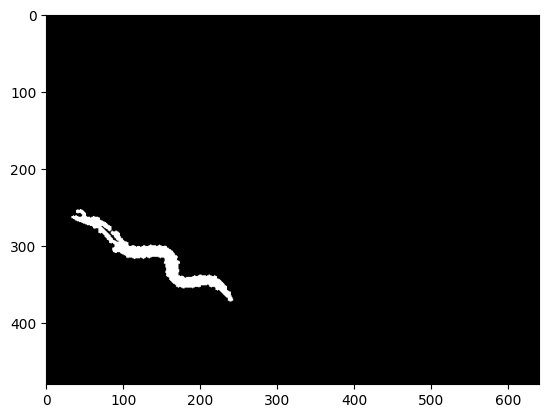

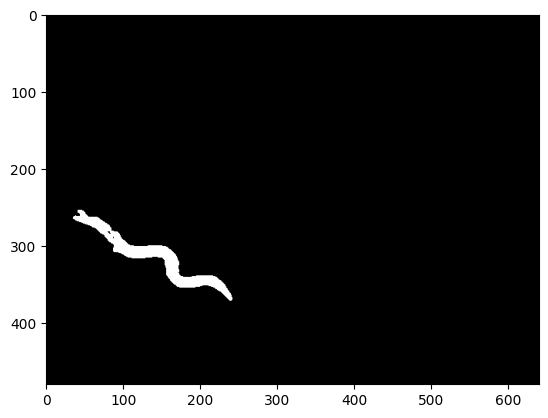

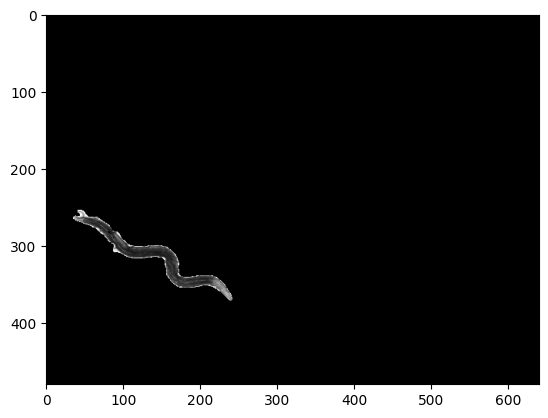

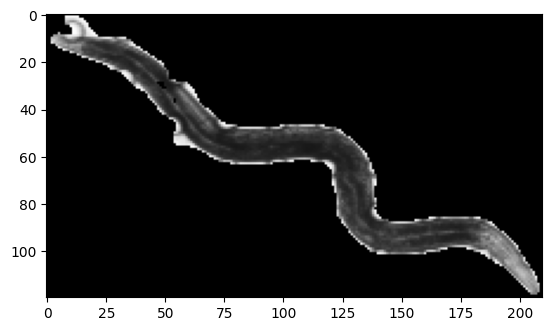

Cropped worm shape: (120, 210, 3), bounding box: (33,253) to (243,373)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[[ 41, 253]],
 
        [[ 40, 254]],
 
        [[ 39, 254]],
 
        [[ 39, 257]],
 
        [[ 40, 257]],
 
        [[ 41, 258]],
 
        [[ 42, 257]],
 
        [[ 44, 257]],
 
        [[ 47, 260]],
 
        [[ 47, 261]],
 
        [[ 45, 263]],
 
        [[ 42, 263]],
 
        [[ 41, 262]],
 
        [[ 40, 262]],
 
        [[ 39, 261]],
 
        [[ 38, 261]],
 
        [[ 37, 262]],
 
        [[ 36, 262]],
 
        [[ 35, 261]],
 
        [[ 34, 262]],
 
        [[ 33, 262]],
 
        [[ 33, 264]],
 
        [[ 34, 264]],
 
        [[ 35, 265]],
 
        [[ 36, 265]],
 
        [[ 38, 267]],
 
        [[ 39, 267]],
 
        [[ 40, 268]],
 
        [[ 42, 268]],
 
        [[ 43, 269]],
 
        [[ 45, 269]],
 
        [[ 46, 270]],
 
      

In [113]:
frameA = cv2.imread('Worm2.png')
if frameA is None:
    print("Frame A loaded unsuccessfully.")
segment_worm(frameA)
